<h1><center>Final Assigment</center></h1>

**Final assigment of the course *Statistical programming and databases***

# Exercise Statement

This project aims to demonstrate the use of scikit in python using an eigenfaces exercise.<br>

First will construct a class for storing the information of the chamber of representatives. Later we will import the image dataset, compute some descriptive statistics, perform an analysis of principal components, clustering analysis and finally will use a non-linear classifier to assess the gender from just the image of the representative. m

###  Diputado Class

A diputado has a Name, Surnames, ID, Picture, Gender and Political Affiliation

In [19]:
%pylab inline
class Diputado(object):
    def __init__(self,ind,fileRoot="./"):
        self.name=""
        self.surname=""
        self.ind=ind
        self.picfile=""
        self.party=""
        self.gender=""
        self.fileRoot=fileRoot
        self.ext="c.jpg" 
    def setName(self,name):
        self.name=name
    def setSurname(self,surname):
        self.surname=surname
    def setParty(self,party):
        self.party=party
    def setGender(self,gender):
        self.gender=gender
    def getName(self):
        return self.name
    def getSurname(self):
        return self.surname
    def getInd(self):
        return self.ind
    def getPicfile(self):
        return self.fileRoot + str(self.ind) + self.ext
    def getParty(self):
        return self.party
    def getGender(self):
        return self.gender

Populating the interactive namespace from numpy and matplotlib


In [20]:
class Parlament(object):
    def __init__(self):
        self.elements=[]
        self.inds=[]
        self.ndips=0
    def add(self, diputado):
        self.elements.append(diputado)
        self.inds.append(diputado.getInd())
        self.ndips +=1
    def getInds(self):
        return [self.elements[i].getInd() for i in range(self.ndips)]
    def len(self):
        return len(self.elements)
    def __getitem__(self, key):
        if isinstance(key, slice):
            indices = key.indices(self.ndips)
            return [self[ii] for ii in xrange(*key.indices(self.len()))] 
        else:
            return self.elements[key]
    def getName(self,key):
        return self.elements[key].getName()
        

In [21]:
import csv
with open('index.csv','r',encoding='utf-8') as csvfile:
    r = csv.reader(csvfile, delimiter=';')
    r.__next__()
    p = Parlament()
    for row in r:
        n = Diputado(int(row[0]),"db/")
        n.setName(row[1].strip())
        n.setSurname(row[2].strip())
        n.setGender(row[3].strip())
        n.setParty(row[4].strip())
        p.add(n)


In [22]:
p.len()
p[99].getPicfile()

'db/91c.jpg'

# Dataset exploration

Let's create a dataset of the analysis. But first, let's see how we can convert an image into a matrix.

Any picture consists of pixels which represents a dot in the image. A pixel consists of three values, and each value is a number between 0-255, representing the amount of its red, green and blue components. The combination of these forms the actual color of the pixel.

'Jordi|Vilajoana Rovira|H'

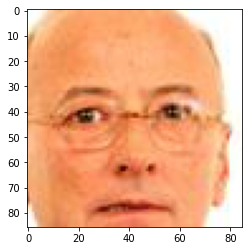

In [39]:
from scipy import ndimage,misc
import numpy as np
import matplotlib.pyplot as pl
idip = 2
I = pl.imread(p[idip].getPicfile())
pl.imshow(I)
np.shape(I)
'|'.join([p[idip].getName(), p[idip].getSurname(), p[idip].getGender()])

In [40]:
I.shape

(86, 85, 3)

Notice that the output of this function is a MxNx3 matrix, where M and N are the dimensions of the image.

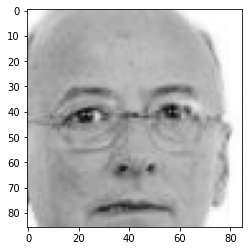

In [41]:
I = pl.imread(p[idip].getPicfile()).mean(axis=2)
img=pl.imshow(I)
img.set_cmap('gray')
Is=shape(I)


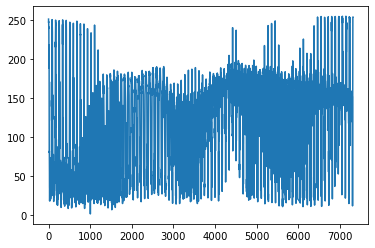

In [10]:
Iv = np.reshape(I,np.prod(Is))
pl.plot(Iv)

Let's stack all images to an array and create a couple of dependent variables

In [11]:
X=np.array([ pl.imread(d.getPicfile()).mean(axis=2).ravel()
             for d in p])
shape(X)
Yg=np.array([ d.getGender() for d in p])
Yp=np.array([ d.getParty() for d in p])
Yp[0:5],Yg[0:5],shape(X)

(array(['GS', 'GS', 'GC-CiU', 'GP', 'GP'], dtype='<U10'),
 array(['H', 'M', 'H', 'H', 'H'], dtype='<U1'),
 (348, 7310))

The array constructed consists of 348 rows, one for each member of the parliament, and 7310 (86x85) columns.
Each column is a pixel of the deputy image. The cell contains the RGB values.

# Analysis

### **1. Compute the mean representative and plot the image corresponding to the mean representative (dataset provided below)**

In [31]:
#We compute the mean column-wise of the dataset 
mX=X.mean(axis=0)
mX.shape

(7310,)

In [32]:
#We reshape the vector of mean columns with the shape of the image defined previously
mX.reshape(Is).shape 

(86, 85)

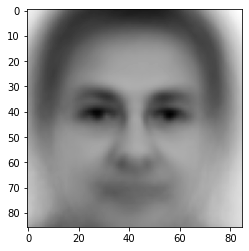

In [33]:
import pylab as pl
pl.figure()
pl.imshow(mX.reshape(Is))

This image stands for the mean face of all members of the Chamber of Representatives.


### **2.Compute the standard deviation and plot the corresponding image**

In [34]:
#We compute the standard deviation through the columns of the dataset 
sX=X.std(axis=0)
sX.shape

(7310,)

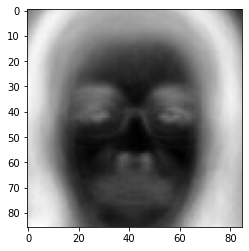

In [35]:
#We reshape the vector obtained into a matrix form and plot the imatge
import pylab as pl
pl.figure()
pl.imshow(sX.reshape(Is))

From the image obtained we can clearly deduce which face features have more variance.<br>

In statistics, the standard deviation is a measure of the amount of dispersion form the mean. A low standard deviation indicates that the values tend to be close to the mean, while a high standard deviation indicates that the values are spread out over a wide range.<br>

Therefore the black parts show that face characteristics that don't differ a lot between all the members, whilst the white parts, as the hair, eyes, or mouth indicate the features that for every person changes.
<br>
<br>

### **3. Run a k-means clustering and split the representatives' data into 10 groups. Plot the full set of images for two groups of your choice.**

In [42]:
#By the K Means algorithm, we split up the data in 10 clusters.
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=10)
k_means.fit(X)

KMeans(n_clusters=10)

In [43]:
#We check the cluster assigment for each observation
labels=k_means.labels_
labels

array([3, 9, 3, 4, 1, 6, 7, 0, 0, 8, 1, 6, 0, 3, 3, 1, 5, 3, 2, 9, 1, 3,
       4, 4, 1, 3, 4, 8, 0, 1, 2, 3, 8, 5, 5, 0, 1, 8, 4, 0, 4, 3, 1, 3,
       2, 8, 3, 8, 8, 3, 9, 1, 4, 0, 3, 8, 1, 4, 3, 3, 2, 9, 3, 0, 3, 7,
       2, 3, 4, 0, 7, 1, 0, 9, 9, 9, 1, 2, 9, 4, 1, 7, 3, 9, 3, 0, 3, 0,
       1, 7, 7, 3, 1, 2, 6, 1, 9, 0, 6, 5, 2, 9, 6, 5, 5, 2, 3, 8, 3, 7,
       3, 2, 1, 7, 5, 4, 3, 1, 0, 3, 3, 8, 3, 4, 5, 1, 4, 6, 8, 7, 8, 2,
       4, 6, 6, 3, 3, 2, 4, 2, 5, 9, 2, 1, 5, 6, 8, 1, 3, 3, 0, 4, 0, 3,
       0, 1, 2, 9, 4, 3, 4, 5, 1, 4, 4, 1, 2, 1, 3, 1, 7, 7, 8, 3, 4, 6,
       8, 6, 8, 1, 4, 7, 3, 1, 1, 5, 1, 4, 4, 8, 1, 9, 8, 9, 9, 6, 8, 3,
       0, 9, 5, 0, 2, 5, 1, 5, 9, 5, 5, 5, 1, 3, 2, 2, 4, 5, 8, 5, 2, 4,
       6, 5, 2, 1, 3, 1, 7, 1, 4, 1, 0, 5, 0, 3, 3, 1, 6, 5, 2, 3, 2, 9,
       8, 4, 6, 9, 1, 5, 1, 2, 4, 5, 0, 5, 0, 9, 1, 4, 1, 6, 5, 1, 5, 2,
       3, 1, 6, 3, 6, 2, 8, 2, 9, 5, 4, 9, 5, 4, 8, 6, 6, 1, 7, 9, 4, 9,
       1, 6, 8, 6, 7, 6, 3, 6, 6, 6, 6, 1, 8, 8, 5,

In [44]:
#We create a vector with the index of the observations of cluster 1 and 0
cluster_0=[index for index,value in enumerate(labels) if value==0]
cluster_1=[index for index,value in enumerate(labels) if value==1]

Once we have indetified which observtaions belong to cluster 0 and 1, we can proceed to plot all the images of the members of this subgroups

In [45]:
#We filter the original matrix with the vector of observations that belongs to cluster 0.
#The vector obtained is reshaped into the matrix form needed to be plotted.
c0=X[cluster_0].reshape((len(cluster_0),Is[0],Is[1]))
c0.shape

(28, 86, 85)

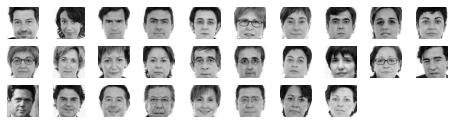

In [46]:
#We obtain a figure with all the member faces that belongs to cluster 0.
pl.figure(figsize=(8,7))

for i in range(0,len(c0)):
    pl.subplot(10,10,i+1)
    pl.imshow(c0[i])
    pl.axis('off')
pl.show()

In [47]:
#We filter the original matrix with the vector of observations that belongs to cluster 1.
#The vector obtained is reshaped into the matrix form needed to be plotted.
c1=X[cluster_1].reshape((len(cluster_1),Is[0],Is[1]))
c1.shape

(50, 86, 85)

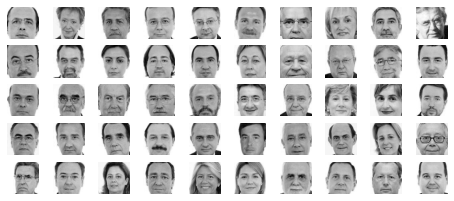

In [48]:
#We obtain a figure with all the member faces that belongs to cluster 1.
pl.figure(figsize=(8,7))

for i in range(0,len(c1)):
    pl.subplot(10,10,i+1)
    pl.imshow(c1[i])
    pl.axis('off')
pl.show()

### 4. Plot the centroid corresponding to each k-means cluster (10 images corresponding to the mean of each cluster)

The center of each clusters is the mean of all the observation belong to that cluster. In python it can be obtained by a method called " clusster_centers".


In [49]:
#The result is a matrix of 10 rows (one for cluster) and  7310 columns(one for the pixel variable)
#Each one of the row is vector which its elements indicates the value of each pixel needed to compute the center of a cluster.
centroid=k_means.cluster_centers_
centroid.shape

(10, 7310)

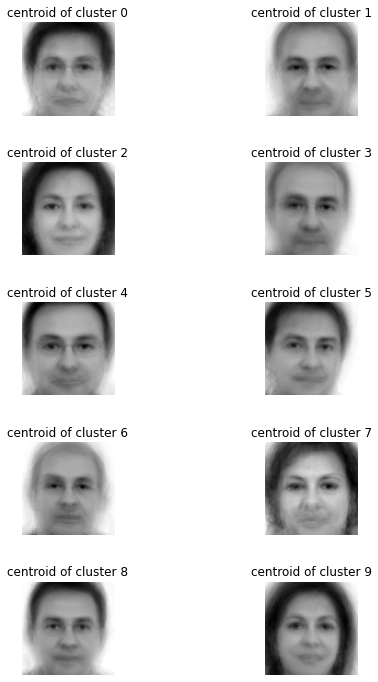

In [50]:
#As the previous exercise we create a loop to plot all the images at once.

pl.figure(figsize=(8,12))

for j in range(0,len(centroid)):
    pl.subplot(5,2,j+1)
    pl.imshow(centroid[j,:].reshape(Is))
    pl.axis('off')
    pl.title('centroid of cluster '+str(j))
    
subplots_adjust(hspace=0.5)

pl.show()

### 5. Fit a PCA model of the dataset.

We compute the principal components form the centered and standarised matrix.

In [52]:
#Importation of packages required
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [53]:
#Scale matrix (Centered and standarised)
sX=preprocessing.scale(X)

In [54]:
#Computation of five principal components
pc = PCA( n_components = 5 )
pc.fit(sX)

PCA(n_components=5)

The PCA is a method used for reduction of multivariate datasets. It is based on the idea of finding a set of orthonormal vectors that optimally describe the variance of the data points.

### 6. Build a 2D score plot with the projections of the representatives onto the PCA plane

To built a 2D score plot plot we need the values of the individuals for all the principal components. This is called the "Score" matrix which contain the original points in the rotated coordinated system defined by the principal components.

In [55]:
#Projected data into the pca plane
T=pc.transform(sX)

In [56]:
#Score matrix
T.shape

(348, 5)

<AxesSubplot:>

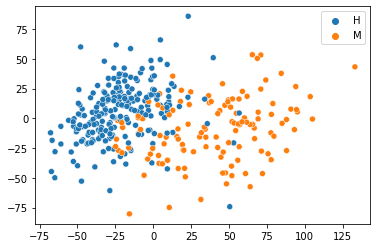

In [58]:
import warnings
warnings.filterwarnings("ignore")
pl.figure()
import seaborn as sns
sns.scatterplot(T[:,0],T[:,1],hue=Yg)

From the scatterplot, we can deduce that men tend to be more similar to each other because they stack together, whilst women present more variance because they are wider spread. 

Moreover, knowing that the points close to the average appear at the origin of the score plot, we can assume that the mean face characteristics belong more to an ordinary man, due to the men's points lie more near to the center.  This makes sense becuase we know that the proportion of men is bigger.

### 7.Plot the first three eigenvectors (principal components, PCs) projection vectors

The principal components are built as a linear combination of the original varibles that  describe the variance of the dataset.<br> Therefore we obtained a matrix of 5 rows (number of components found) and 7310 columns (The coefficients of each initial variable in the combination built to compute each principal component)

In [59]:
pc.components_.shape

(5, 7310)

In [60]:
#As we did in previous exercise we transform these vectors into the form needed to be plotted.
eigenvector=pc.components_.reshape((5, Is[0], Is[1]))
eigenvector.shape

(5, 86, 85)

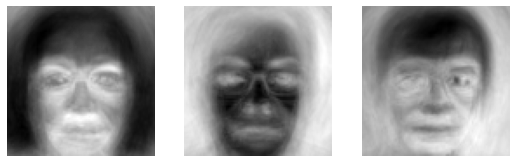

In [61]:
#We perform the loop to plot the first three eigenvector at once

pl.figure(figsize=(9,3))
for i in range(0,3):
    pl.subplot(1,3,i+1)
    pl.imshow(eigenvector[i])
    pl.axis('off')
pl.show()

The first pc shows us the covariance of the most characteristic facial features, thus looking at the plotted image we can deduce that the white indicates the face features with a low covariance, whereas the black part indicates the feature that variate more, like for instance, the hair.


### 8.Plot the amount of variance explained by each PCs

The pc are obtained as normalized eigenvector of the matrix covariance (X'X) with the eigenvalues that defined how much variance of the original dataset is explained.

In [62]:
#Eigenvalues
pc.explained_variance_ratio_

array([0.2136283 , 0.08746378, 0.07299065, 0.0517424 , 0.04674383])

In [63]:
sum(pc.explained_variance_ratio_[:2])

0.3010920840733342

The lower dimension approximation explains the 30% of the variability of the dataset.

### 9.Train a gender predictor  with the class of representatives. Which performance can you get on predicting gender from the images? Provide metrics.

In order to apply a supervised learning algorithm we first need to split the data into train data and validation/test data.

In [142]:
#Remainder of the dimension of the dataset
X.shape

(348, 7310)

In [143]:
#Remainder of vector Yg with the label of the gender for each member of the parlament
Yg[0:5]

array(['H', 'M', 'H', 'H', 'H'], dtype='<U1')

In [153]:
# Convert Yg into binary vector
Yg_bin=np.where(Yg=="H",1,0)
Yg_bin[0:5]

array([1, 0, 1, 1, 1])

In [154]:
Yg_bin.shape

(348,)

The main idea of a supervise algorithm is to find a model that explains the relation between the observed data X and the label data Yg.

In [155]:
#We will use 30% of the data for the validation of the model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Yg_bin, test_size = 0.3, random_state = 0)

In [156]:
print(X_train.shape,X_test.shape)

(243, 7310) (105, 7310)


In [157]:
print(y_train.shape,y_test.shape)

(243,) (105,)


In [158]:
#We use K-Nearest Neighbors Algorithm (K-NN)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [159]:
ypredicted=knn.predict(X_test)

In [160]:
#Check accuracy of our model on the test data
knn.score(X_test, y_test)

0.8857142857142857

The curracy of our model is 88%. It seems quiet good, but we must take into aware that the accuracy is not a good metric when dealing with unbalanced data. Our dataset contains more men than women, so if our model would predict all mens correctly we would have got 64% of accuracy.

In this case, it is better to rely in other metric such AUC to assess the performance of the model.

In [161]:
mens_deputy=np.where(Yg=="H",1,0)
mens_deputy.sum()/len(Yg)

0.6408045977011494

The Area under the curve (AUC) is the measure of the hability of a classifier to distinguish between classes and is used as a summary of ROC curve.

The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.
- When AUC=1, then the classifier is able to perfectly distinguish between the men and women.
- When AUC=0, then the classifier would predict all women as men, and the other way around

In [162]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,ypredicted)

0.8500000000000001

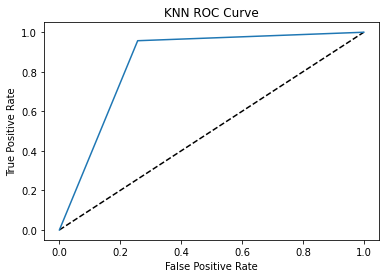

In [164]:
# Plotting the ROC curve
from sklearn.metrics import roc_curve
y_pred_prob = knn.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test,ypredicted)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label="Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("KNN ROC Curve")
plt.show()

In [165]:
#We perform an evaluation of our model
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np


labels = np.unique(y_test)
a =  confusion_matrix(y_test, ypredicted, labels=labels)

pd.DataFrame(a, index=labels, columns=labels)

,0,1
0,26,9
1,3,67


From the confusion matrix, we can detect the number of members predicted wrongly. For instance, we predicted 3 members as women (Mujer) when actually they were Men (Hombre), or in the other way around, we predicted 9 members as men when they actually were women.

Besides in the diagonal, we can observe the accurate prediction. For example, 67 out of 105 members were correctly predicted as men.

In [166]:
#We perform a second evaluation of our model
from sklearn.metrics import classification_report
print(classification_report(y_test,ypredicted))

              precision    recall  f1-score   support

           0       0.90      0.74      0.81        35
           1       0.88      0.96      0.92        70

    accuracy                           0.89       105
   macro avg       0.89      0.85      0.87       105
weighted avg       0.89      0.89      0.88       105



From the output obtained we measure the quality of predictions from a classification algorithm.

The column *precisions* shows the accuracy of positive prediction. Precision is the ability of a classifier not to label an instance positive that is actually negative. For example, 88% of the time the prediction for a man will be correct.

The Column *recall* shows the proportion of prediction done correctly. For instance,96% of the times we have said it was men, was actually men. Notice that (0.96*70=67) is the value we have seen in the confusion matrix.


The F1 score is a weighted harmonic mean of "precision" and "recalls" such that the best score is 1.0 and the worst is 0.0. Generally speaking, F1 scores are lower than accuracy measures as they embed "precision" and "recall" into their computation. As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy.